#Examen de Certificación – Intento 1
## Requisitos

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado aquí.  



## Limpieza de datos con Python:
Identificar y solucionar cualquier valor duplicado.

Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).



### 1. Preparación del ambiente

In [158]:
#se importan librerias que utilizaré para desarrollar el examen
import pandas as pd
from google.colab import drive
#para visualizaciones
import matplotlib.pyplot as plt
import plotly.express as px

#montar google drive para conectarse a la base de datos
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/SONDA | Data Science/Data Science Fundamentals/Examen/WA_Fn-UseC_-Telco-Customer-Churn.csv"
#como el tipo de archivo es un csv utilizamos la funcion read_csv
df = pd.read_csv(path)

### 2. Analizar y limpiar

In [121]:
#ver las primeras 20 filas
df.head(20)

#limpiar los nombres de las columnas
df.columns.str.strip()

#cabeceras: algunas tienen mayuculas, voy a normalizar ya que las columnas	customerID, gender, tenure no comienzan con letra mayuscula
new_names = {
    "customerID": "CustomerID",
    "gender":"Gender",
    "tenure":"Tenure"
}

df.rename(columns=new_names, inplace=True)
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
df.info() #ver columnas tipo de datos y cantidad de filas
#En esta primera vista NO se observan datos nulos ya que todas las columnas tienen 7043 filas
#Para confirmar que no existan nulos
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [123]:
#Inicialmente, como tipo de datos existen object, int y float

df["Gender"].value_counts()
df["SeniorCitizen"].value_counts()
df["Partner"].value_counts()
df["Dependents"].value_counts()
df["PhoneService"].value_counts()
df["MultipleLines"].value_counts()
df["InternetService"].value_counts()
df["OnlineSecurity"].value_counts()
df["DeviceProtection"].value_counts()
df["TechSupport"].value_counts()
df["StreamingTV"].value_counts()
df["StreamingMovies"].value_counts()
df["Contract"].value_counts()
df["PaperlessBilling"].value_counts()
df["PaymentMethod"].value_counts()
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [124]:
df.info()
#se observa que la columna  TotalCharges  esta como objetc y debe ser float.
#Inicialmente no fue posible aplicar df["TotalCharges"] = df["TotalCharges"].astype(float) el error muestra que hay str
df["TotalCharges"].value_counts() #se observa que hay 11 filas en las que TotalCharges hay un str vacío "" o con un espacio " " probablemente
df[df["TotalCharges"] == " "][["Tenure", "MonthlyCharges", "TotalCharges"]] #existen 11 registros con TotalCharges en " "
#se observa que Tenure (meses de tenencia del servicio) para estos 11 casos es igual 0
#reviso otros casos donde Tenure sea 0
df[(df["Tenure"] == 0) & (df["TotalCharges"] != " ")][["Tenure", "MonthlyCharges", "TotalCharges"]]

#debido a que estos 11 casos presentan 0 meses de servicio y no existen casos donde 0 meses de servicio tenga un cobro, completaré los datos faltantes con 0
df.loc[df["TotalCharges"]  == " ", "TotalCharges"] = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
#compruebo que se haya aplicado el cambio y aparezacan 0 en vez de " "
df[(df["Tenure"] == 0) ][["Tenure", "MonthlyCharges", "TotalCharges"]]

,Tenure,MonthlyCharges,TotalCharges
488,0,52.55,0
753,0,20.25,0
936,0,80.85,0
1082,0,25.75,0
1340,0,56.05,0
3331,0,19.85,0
3826,0,25.35,0
4380,0,20.00,0
5218,0,19.70,0
6670,0,73.35,0


In [126]:
#Ahora puedo aplicar la conversión de tipo de dato a la columna TotalCharges de objt a float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [127]:
#confirmar el cambio en el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.shape #se observan 21 columnas y 7043 filas

(7043, 21)

In [131]:
#verificar si existen duplicados
df.duplicated().sum() #no existen duplicados

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [132]:
#comprobar la coherencia de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


##Exploración de datos con Python:
Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### Visualizaciones Univariadas

#### Visualización N 1

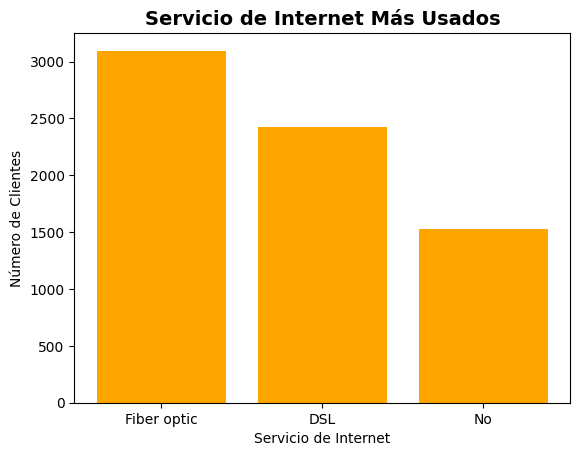

In [157]:
#tipo de servicio de internet y numero de clientes
servicio_clientes = df["InternetService"].value_counts()
plt.bar(servicio_clientes.index, servicio_clientes.values,color='orange')
plt.title('Servicio de Internet Más Usados', fontsize=14, weight="bold")
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.show()

En este gráfico de barras podemos observar que la mayoría de los clientes que tiene contratado un servicio de internet opta por Fibra Optica. Tambien podemos concluir que al rededor de 1500 clientes no tienen contratado un servicio de internet.

#### Visualización N 2

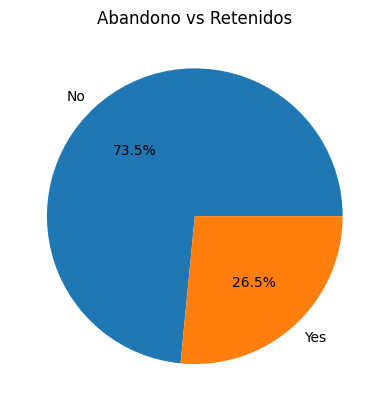

In [169]:
churn_counts = df["Churn"].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct="%.1f%%")
plt.title("Abandono vs Retenidos")
plt.show()

En este gráfico de torta se observa que un 26,5% de los clientes abandonó el servicio y un 73.5% no lo abandonó.

### Visualizaciones Multivariadas


#### Visualización N 4

In [198]:
fig = px.scatter(
    df,
    x='MonthlyCharges',
    y='TotalCharges',
    size='Tenure',
    color='Churn',
    symbol='Gender',
    title='Relación entre Cargos, Abandono y Género'
)
fig.show()


En este gráfico de dispersión se observa que el tamaño de las figuras de "Yes" es decir de los abandonos es más pequeño, por lo que el tiempo en la compañia era menor. Esto indica que el abandono ocurre principalmente en los primeros meses de contrato.

#### Visualización N 5

In [185]:
fig = px.box(
    df,
    x='Churn',
    y='MonthlyCharges',
    color='Churn',
    title='Distribución de Cargos Mensuales Según Abandono'
)
fig.show()

En este gráfico de caja podemos observar que el cargo mensual de los abandonos es mayor que el de los retenidos, pudiendo explicar el motivo del abandono.

## Fuentes
Clase 9 - 05/06/25 - limpieza de datos y EDA.ipynb  
Clase 11 - 10/06/25 - histogramas, diagramas de caja y subplot.ipynb  
Clase 12 - 11/06/25 - otras bibliotecas de visualizacion.ipynb